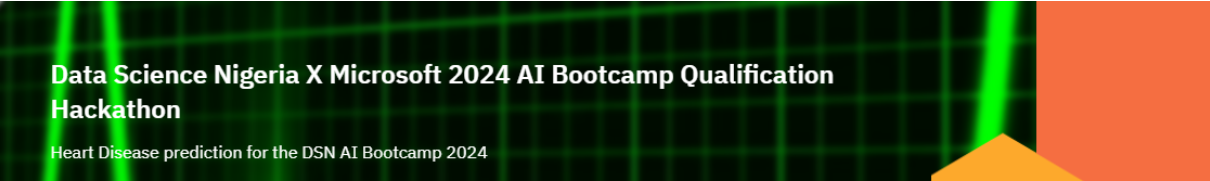 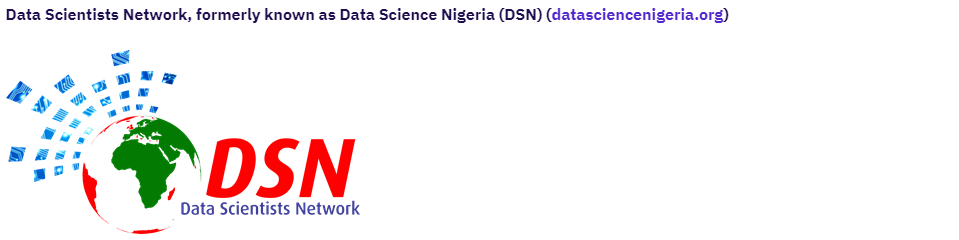

###### Hackathon Project Description

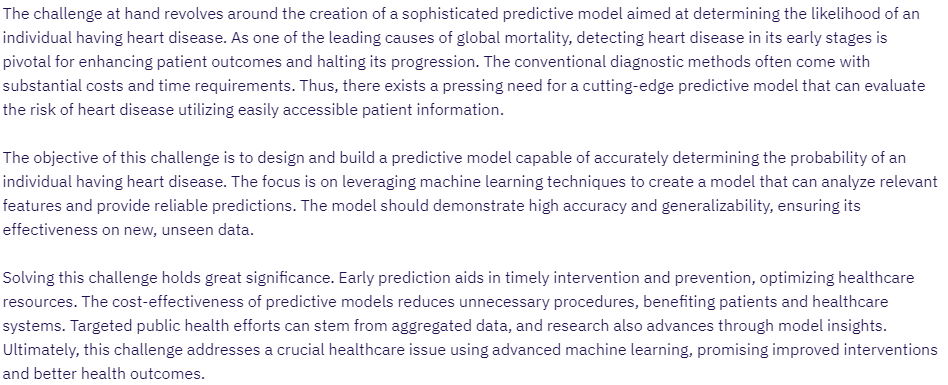

###### Project delivered by: `Olanrewaju Adegoke`
###### Email: `larrysman2004@yahoo.com`
###### Zindi Profile: https://zindi.africa/users/olalytics
###### Github: https://github.com/larrysman

###### Define the paths to the project folders

In [612]:
main = 'C:\\Users\\Olanrewaju Adegoke\\Desktop\\TechTern\\mywork\\DSNX_Microsoft2024'
data_path = '../data'
model_path = '../models'
note_path = '../notebooks'
out_path = '../outputs'
vis_path = '../visuals'
res_path = '../resources'

###### Import necessary libraries

In [613]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import os

###### Load the dataset

In [614]:
os.chdir(data_path)

In [615]:
train = pd.read_csv('Train Dataset .csv')
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [616]:
test = pd.read_csv('Test Dataset.csv')
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


#### <font color = 'green'> Preprocessing the Training Data

In [617]:
train.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,16167,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,11275,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,13251,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,19921,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,11293,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [618]:
df = train.copy()

In [619]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7303 entries, 0 to 7302
Data columns (total 15 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   Id        7303 non-null   int64  
 1   Age       7303 non-null   int64  
 2   Sex       7303 non-null   int64  
 3   cp        7303 non-null   int64  
 4   trestbps  7303 non-null   int64  
 5   chol      7303 non-null   int64  
 6   fbs       7303 non-null   int64  
 7   restecg   7303 non-null   int64  
 8   thalach   7303 non-null   int64  
 9   exang     7303 non-null   int64  
 10  oldpeak   7303 non-null   float64
 11  slope     7303 non-null   int64  
 12  ca        7303 non-null   int64  
 13  thal      7303 non-null   int64  
 14  target    7303 non-null   int64  
dtypes: float64(1), int64(14)
memory usage: 855.9 KB


In [620]:
print(f'There are {df.shape[0]} rows and {df.shape[1]} columns in the dataset.')

There are 7303 rows and 15 columns in the dataset.


##### Statistical Description of the dataset

In [621]:
df.describe()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000,7303.000000
mean,15021.535396,53.172669,0.499658,1.502533,147.447487,342.805970,0.493085,1.013008,136.506093,0.503218,3.129851,0.991510,2.019033,1.502259,0.813501
std,2886.026080,14.185970,0.500034,1.115594,31.099538,127.291998,0.499986,0.815806,38.141966,0.500024,1.791160,0.817291,1.410546,1.113137,0.389535
min,10001.000000,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,12521.500000,41.000000,0.000000,1.000000,120.000000,231.000000,0.000000,0.000000,104.000000,0.000000,1.600000,0.000000,1.000000,1.000000,1.000000
50%,15054.000000,53.000000,0.000000,1.000000,148.000000,341.000000,0.000000,1.000000,137.000000,1.000000,3.100000,1.000000,2.000000,1.000000,1.000000
75%,17513.500000,65.000000,1.000000,3.000000,174.000000,450.000000,1.000000,2.000000,170.000000,1.000000,4.700000,2.000000,3.000000,2.000000,1.000000
max,19998.000000,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


For the numerical columns, the dataset will takes standard scaling and minimum-maximum scaling to normalize the dataset.

In [622]:
df.isnull().sum()

Id          0
Age         0
Sex         0
cp          0
trestbps    0
chol        0
fbs         0
restecg     0
thalach     0
exang       0
oldpeak     0
slope       0
ca          0
thal        0
target      0
dtype: int64

In [623]:
df.duplicated().sum()

0

###### drop the unwanted column

In [624]:
unwanted_col = ['Id']

In [625]:
df.drop(columns=unwanted_col, inplace=True)

In [626]:
df.head()

,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1


In [627]:
df.target.value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

There is class imbalance in the dataset and we need to correct the imbalance. The label == 1 contains 4 times the label == 0.

In [628]:
print('The already encoded categorical columns.')
df.Sex.value_counts()
df.cp.value_counts()
df.fbs.value_counts()
df.restecg.value_counts()
df.exang.value_counts()
df.slope.value_counts()
df.ca.value_counts()
df.thal.value_counts()
print('The categorical columns are: ', ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal'])

The already encoded categorical columns.
The categorical columns are:  ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']


#### <font color = 'green'> Feature Engineering

###### Binning Technique - Feature Engineering

In [629]:
def binning_column(df, col_name, labels):

    num = len(labels) + 1
    bins = np.linspace(df[col_name].min(), df[col_name].max(), num)

    df[f'{col_name}_binned'] = pd.cut(
        df[col_name],
        bins,
        labels=labels,
        include_lowest=True
    )

    return df   

###### `AGE`

In [630]:
df = df
col_name = 'Age'
labels = ['young', 'adult', 'aged']

df = binning_column(df, col_name, labels)

###### `blood pressure` -> `trestbps`

In [631]:
df = df
col_name = 'trestbps'
labels = ['low', 'moderate', 'high']

df = binning_column(df, col_name, labels)

###### `cholestrol` -> `chol`

In [632]:
df = df
col_name = 'chol'
labels = ['low', 'moderate', 'high']

df = binning_column(df, col_name, labels)

###### `heart rate pressure` -> `thalach`

In [633]:
df = df
col_name = 'thalach'
labels = ['low', 'medium', 'high']

df = binning_column(df, col_name, labels)

In [634]:
print('dimension is:', df.shape)
df.head()

dimension is: (7303, 18)


,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target,Age_binned,trestbps_binned,chol_binned,thalach_binned
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1,1,young,moderate,low,medium
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0,0,adult,high,low,low
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1,1,young,low,low,medium
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2,1,aged,low,moderate,low
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0,1,young,moderate,high,high


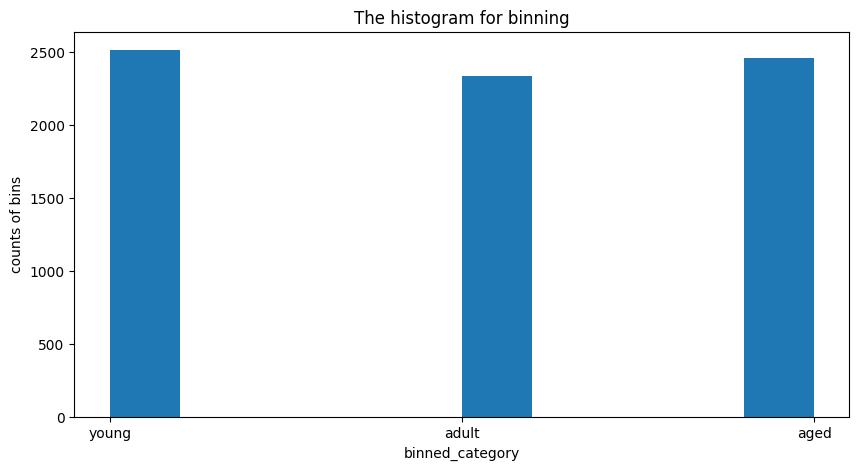

In [635]:
plt.figure(figsize=(10, 5))

plt.hist(df['Age_binned'])
plt.xlabel('binned_category')
plt.ylabel('counts of bins')
plt.title('The histogram for binning')
plt.show()

###### Select Features and Target

In [637]:
features = df.drop(columns=['target'])
target = df['target']

In [638]:
print('dimension', features.shape)
features.head()

dimension (7303, 17)


,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,Age_binned,trestbps_binned,chol_binned,thalach_binned
0,33,0,1,158,205,1,0,154,0,1.5,1,4,1,young,moderate,low,medium
1,53,1,2,198,154,0,1,104,0,0.8,2,1,0,adult,high,low,low
2,37,1,2,101,202,1,0,155,0,2.1,1,3,1,young,low,low,medium
3,75,0,0,113,306,1,2,88,1,4.9,0,2,2,aged,low,moderate,low
4,35,1,2,139,419,1,1,166,1,0.9,2,4,0,young,moderate,high,high


In [639]:
target.head()

0    1
1    0
2    1
3    1
4    1
Name: target, dtype: int64

##### <font color = 'green'> Preprocessing the features

###### Numerical columns selection

In [640]:
num_cols = ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']

num_data = features[num_cols]

In [641]:
num_data.head()

,Age,trestbps,chol,thalach,oldpeak
0,33,158,205,154,1.5
1,53,198,154,104,0.8
2,37,101,202,155,2.1
3,75,113,306,88,4.9
4,35,139,419,166,0.9


###### Categorical columns selection

In [644]:
cat_cols = features.drop(columns=num_cols).columns.tolist()
print(f'cat_cols are {cat_cols}')

cat_data = features[cat_cols]

cat_cols are ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal', 'Age_binned', 'trestbps_binned', 'chol_binned', 'thalach_binned']


In [645]:
cat_data.head()

,Sex,cp,fbs,restecg,exang,slope,ca,thal,Age_binned,trestbps_binned,chol_binned,thalach_binned
0,0,1,1,0,0,1,4,1,young,moderate,low,medium
1,1,2,0,1,0,2,1,0,adult,high,low,low
2,1,2,1,0,0,1,3,1,young,low,low,medium
3,0,0,1,2,1,0,2,2,aged,low,moderate,low
4,1,2,1,1,1,2,4,0,young,moderate,high,high


###### Numerical Transformation

In [646]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler
scaler_v6 = StandardScaler()
min_max_v6 = MinMaxScaler()

def num_preprocessing(num_data):
    
    num = scaler_v6.fit_transform(num_data)
    num_trans = min_max_v6.fit_transform(num)

    num_df = pd.DataFrame(num_trans, columns=list(num_data.columns))

    return scaler_v6, min_max_v6, num_df  

###### Categorical Encoding

In [647]:
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
one_hot_v6 = OneHotEncoder(sparse_output=False).set_output(transform='pandas')
label_encoder_v6 = LabelEncoder()

def cat_preprocessing(cat_data):

    already_encoded_cols = ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    already_encoded_df = cat_data[already_encoded_cols]
    to_be_encoded_cols = cat_data.drop(columns=already_encoded_cols).columns.tolist()
    to_be_encoded_df = cat_data[to_be_encoded_cols]

    cat_encoded = one_hot_v6.fit_transform(to_be_encoded_df)
    cat_df = cat_encoded.reset_index(drop=True)
    
    full_cat_df = pd.concat([already_encoded_df, cat_df], axis=1)

    return one_hot_v6, full_cat_df

In [648]:
num_data
cat_data

def concatenate_num_cat_data(num_data, cat_data):

    scaler_v6, min_max_v6, num_df = num_preprocessing(num_data)
    one_hot_v6, full_cat_df = cat_preprocessing(cat_data)

    num_cat_df = pd.concat([num_df, full_cat_df], axis=1)

    return num_cat_df, scaler_v6, min_max_v6, one_hot_v6    

In [649]:
num_cat_df, scaler_v6, min_max_v6, one_hot_v6 = concatenate_num_cat_data(num_data, cat_data)

In [650]:
num_cat_df.shape

(7303, 25)

In [651]:
scaler_v6, min_max_v6, one_hot_v6

(StandardScaler(), MinMaxScaler(), OneHotEncoder(sparse_output=False))

###### Target Transformed

In [652]:
target = target.reset_index(drop=True)
target.head()

0    1
1    0
2    1
3    1
4    1
Name: target, dtype: int64

###### Concatenate the transformed dataset

In [653]:
cleaned_df = pd.concat([num_cat_df, target], axis=1)
cleaned_df.head()

,Age,trestbps,chol,thalach,oldpeak,Sex,cp,fbs,restecg,exang,...,trestbps_binned_high,trestbps_binned_low,trestbps_binned_moderate,chol_binned_high,chol_binned_low,chol_binned_moderate,thalach_binned_high,thalach_binned_low,thalach_binned_medium,target
0,0.083333,0.603774,0.180365,0.633588,0.241935,0,1,1,0,0,...,0.0,0.0,1.0,0.0,1.0,0.0,0.0,0.0,1.0,1
1,0.500000,0.981132,0.063927,0.251908,0.129032,1,2,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
2,0.166667,0.066038,0.173516,0.641221,0.338710,1,2,1,0,0,...,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1
3,0.958333,0.179245,0.410959,0.129771,0.790323,0,0,1,2,1,...,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,0.0,1
4,0.125000,0.424528,0.668950,0.725191,0.145161,1,2,1,1,1,...,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,0.0,1


###### Correcting the data imbalance in the target

###### SMOTE-ENN - SYTHENTIC MINORITY OVER-SAMPLING TECHNIQUE - EDITED NEAREST NEIGHBORS
`Smote ENN combines oversamplng with the ENN undersampling techniques and removes noisy from the majority class after oversampling.`

`!pip install imbalanced-learn`

###### Visualizing the spread of the label imbalance

In [654]:
cleaned_df.target.value_counts()

target
1    5941
0    1362
Name: count, dtype: int64

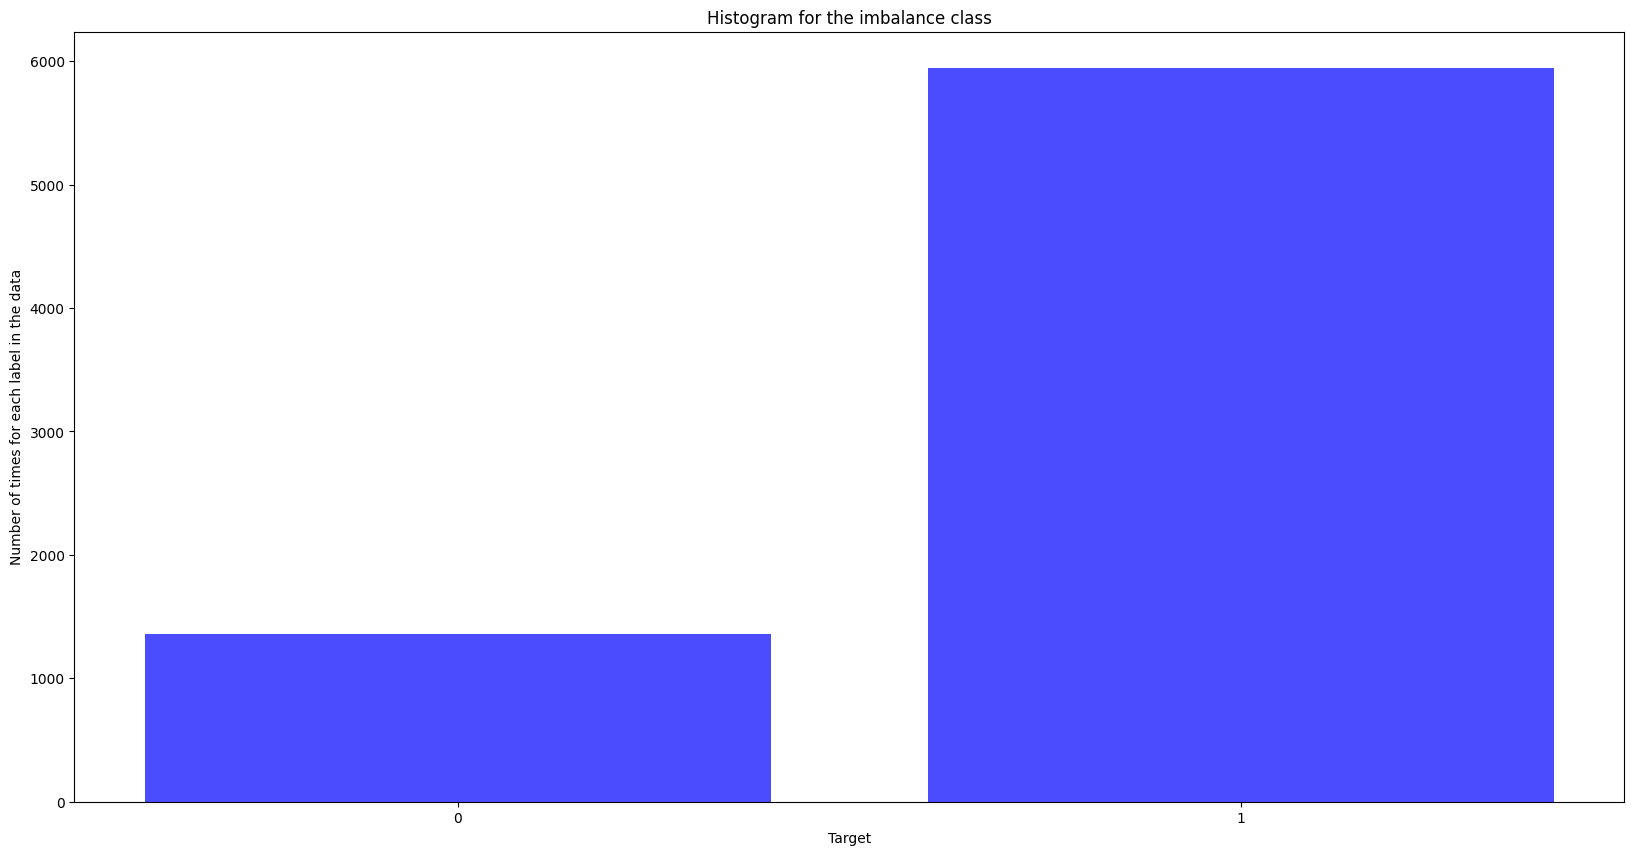

In [538]:
plt.figure(figsize=(20, 10))
plt.hist(cleaned_df['target'], bins=range(3), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram for the imbalance class')
plt.xlabel('Target')
plt.ylabel('Number of times for each label in the data')
plt.xticks(range(2), ['0', '1'])
plt.show()

In [655]:
from imblearn.combine import SMOTEENN

seed = 42
smote_enn = SMOTEENN(random_state=seed)

def correct_imbalance(df, target_col):
    
    features = df.drop(columns=[target_col])
    target = df[target_col]

    bal_feat, bal_targ = smote_enn.fit_resample(features, target)

    balanced_df = pd.concat([bal_feat, bal_targ], axis=1)

    return balanced_df

In [656]:
balanced_df = correct_imbalance(df = cleaned_df, target_col = 'target')
balanced_df.head()

,Age,trestbps,chol,thalach,oldpeak,Sex,cp,fbs,restecg,exang,...,trestbps_binned_high,trestbps_binned_low,trestbps_binned_moderate,chol_binned_high,chol_binned_low,chol_binned_moderate,thalach_binned_high,thalach_binned_low,thalach_binned_medium,target
0,0.500000,0.981132,0.063927,0.251908,0.129032,1,2,0,1,0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.833333,0.660377,0.351598,0.129771,0.806452,1,3,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,0.208333,0.358491,0.723744,0.633588,0.935484,0,2,1,0,0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.750000,0.811321,0.778539,0.854962,0.854839,1,2,0,0,0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0.895833,0.509434,0.337900,0.778626,0.370968,1,2,0,0,0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0


In [657]:
balanced_df['target'].value_counts()

target
0    5703
1    3273
Name: count, dtype: int64

In [658]:
balanced_df.shape

(8976, 26)

###### Visualizing the spread of the balanced labels

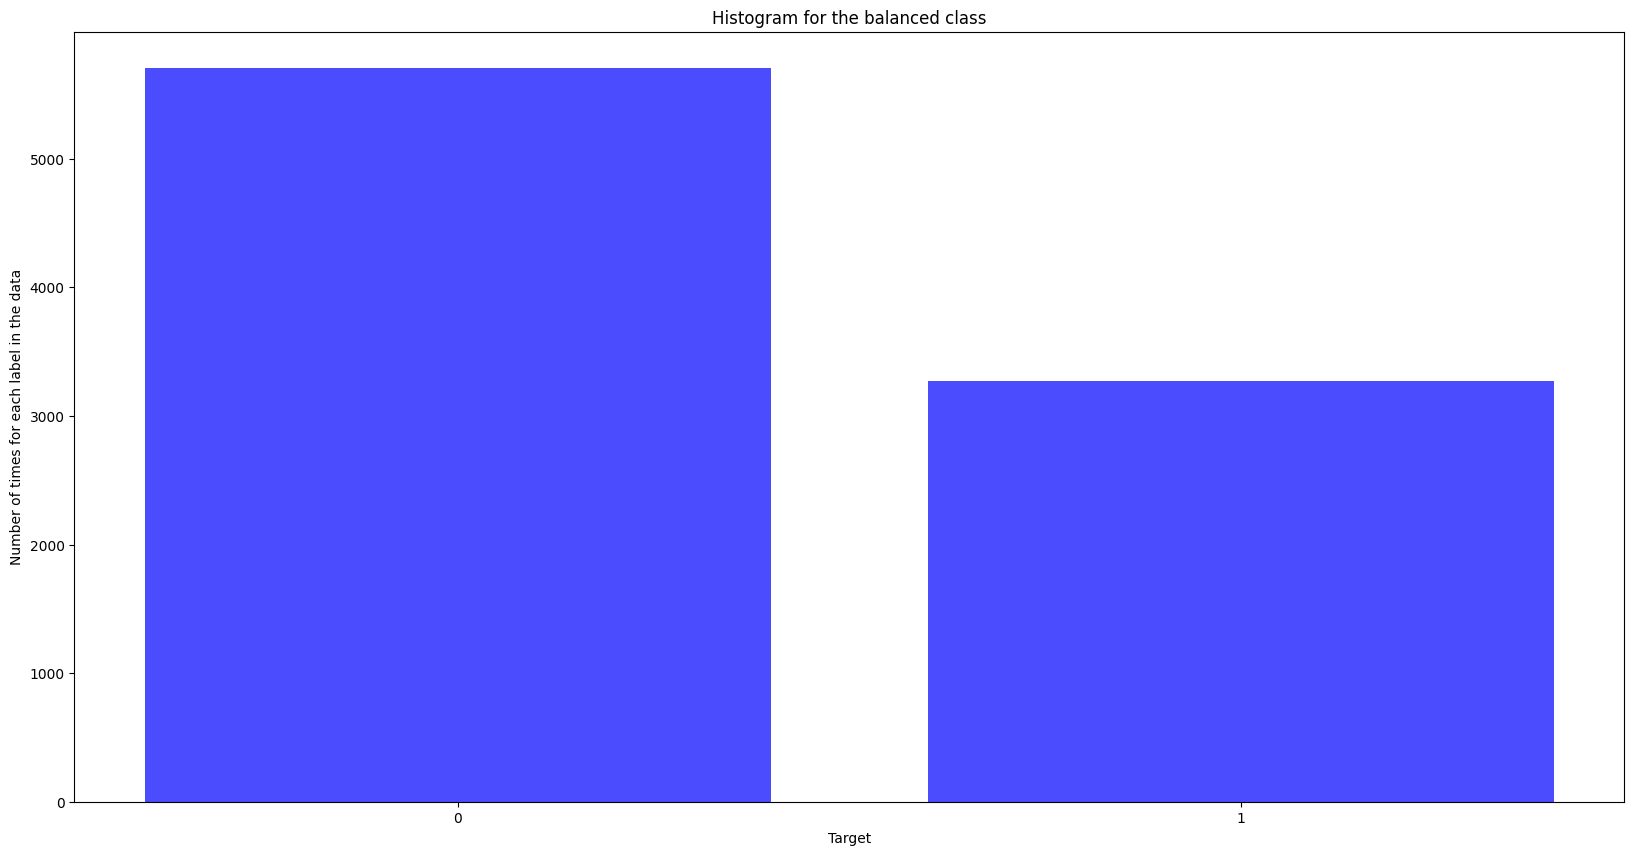

In [659]:
plt.figure(figsize=(20, 10))
plt.hist(balanced_df['target'], bins=range(3), align='left', rwidth=0.8, color='blue', alpha=0.7)
plt.title('Histogram for the balanced class')
plt.xlabel('Target')
plt.ylabel('Number of times for each label in the data')
plt.xticks(range(2), ['0', '1'])
plt.show()

##### <font color = 'green'> Correlation Analysis for multicollinearity

In [660]:
def correlation_analysis(df, target_col):
    
    features = df.drop(columns=[target_col])
    target = df[target_col]

    # Determining the highest correlated features with threshold = 0.8
    corr_matrix = features.corr()
    high_corr_features = np.where(np.abs(corr_matrix) > 0.8)
    high_corr_features = [[corr_matrix.index[x], corr_matrix.columns[y]] for x, y in zip(*high_corr_features) if x != y and x < y]

    corr_list = []
    print('Highly correlated features are: ')
    for feat1, feat2 in high_corr_features:
        print(f"{feat1} and {feat2}: {corr_matrix.loc[feat1, feat2]:.2f}")
        corr_list.append(feat1)
    corr_list = list(set(corr_list))

    corr_features_dropped = features.drop(columns=corr_list)
    new_df = pd.concat([corr_features_dropped, target], axis=1)

    # Visualizing the correlation matrix using heatmap
    plt.figure(figsize=(12, 10))
    sb.heatmap(corr_matrix, annot=False, cmap='coolwarm')
    plt.title('Feature Correlation Heatmap')
    plt.show()
    
    return corr_list, new_df    

Highly correlated features are: 
Age and Age_binned_aged: 0.82
Age and Age_binned_young: -0.83
trestbps and trestbps_binned_high: 0.83
trestbps and trestbps_binned_low: -0.82
chol and chol_binned_high: 0.83
chol and chol_binned_low: -0.83
thalach and thalach_binned_high: 0.83
thalach and thalach_binned_low: -0.83


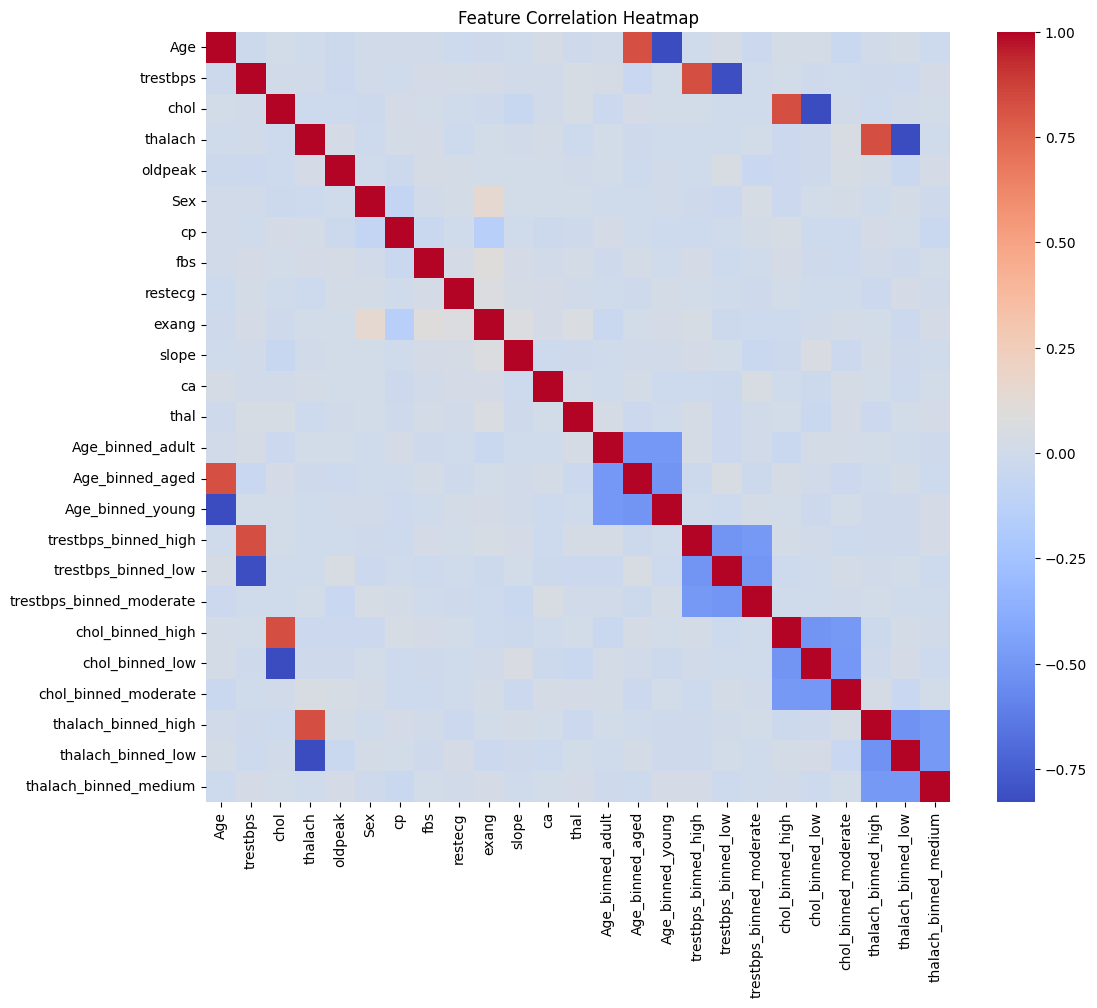

In [661]:
df = balanced_df
target_col = 'target'

corr_list, balanced_df = correlation_analysis(df, target_col)

In [662]:
corr_list

['chol', 'thalach', 'trestbps', 'Age']

In [663]:
balanced_df.head()

,oldpeak,Sex,cp,fbs,restecg,exang,slope,ca,thal,Age_binned_adult,...,trestbps_binned_high,trestbps_binned_low,trestbps_binned_moderate,chol_binned_high,chol_binned_low,chol_binned_moderate,thalach_binned_high,thalach_binned_low,thalach_binned_medium,target
0,0.129032,1,2,0,1,0,2,1,0,1.0,...,1.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0
1,0.806452,1,3,0,0,0,0,0,0,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,0.0,1.0,0.0,0
2,0.935484,0,2,1,0,0,2,0,0,0.0,...,0.0,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,0
3,0.854839,1,2,0,0,0,0,4,1,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0
4,0.370968,1,2,0,0,0,0,3,1,0.0,...,0.0,0.0,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0


#### Feature Selection

`Applied the combination of multiple algorithms to select the most important features.`

In [664]:
from sklearn.feature_selection import SelectKBest, f_classif
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.feature_selection import RFE

def feature_selector(df, target_col, num_of_feature):
    
    features = df.drop(columns=[target_col])
    target = df[target_col]

    # Univariate Feature Selection (SelectKBest)
    selector = SelectKBest(f_classif, k=num_of_feature)
    feat_transformed = selector.fit_transform(features, target)
    feat_names = features.columns[selector.get_support()].tolist()

    # Random Forest Feature Importance
    rf_clf = RandomForestClassifier(n_estimators=100, random_state=42)
    rf_clf.fit(features, target)
    importances = rf_clf.feature_importances_
    feature_importances = pd.Series(importances, index=features.columns).sort_values(ascending=False)
    top_features = feature_importances.head(num_of_feature).index.tolist()

    # Recursive Feature Elimination (RFE)
    logistic = LogisticRegression(random_state=42)
    rfe = RFE(estimator=logistic, n_features_to_select=num_of_feature)
    rfe.fit_transform(features, target)
    rfe_selected_features = features.columns[rfe.support_].tolist()

    # Combine the results and select the final set of important features
    all_selected_features = set(feat_names + rfe_selected_features + top_features)
    # Create a new dataset with selected features
    important_features_selected = features[list(all_selected_features)]

    df_selected = pd.DataFrame(important_features_selected, columns=list(all_selected_features))
    full_df = pd.concat([df_selected, target], axis=1)

    print("All selected features:")
    print(all_selected_features)

    return selector, rfe, full_df, top_features

###### Selecting top N important features

In [665]:
df = balanced_df
num_of_feature = 15
target_col = 'target'
selector, rfe, balanced_df, top_features = feature_selector(df, target_col, num_of_feature)

All selected features:
{'trestbps_binned_high', 'Age_binned_adult', 'chol_binned_high', 'thalach_binned_high', 'thalach_binned_low', 'oldpeak', 'trestbps_binned_low', 'trestbps_binned_moderate', 'ca', 'thalach_binned_medium', 'Sex', 'Age_binned_young', 'exang', 'chol_binned_low', 'chol_binned_moderate', 'cp', 'thal', 'restecg', 'fbs', 'slope'}


In [666]:
balanced_df.head()

,trestbps_binned_high,Age_binned_adult,chol_binned_high,thalach_binned_high,thalach_binned_low,oldpeak,trestbps_binned_low,trestbps_binned_moderate,ca,thalach_binned_medium,...,Age_binned_young,exang,chol_binned_low,chol_binned_moderate,cp,thal,restecg,fbs,slope,target
0,1.0,1.0,0.0,0.0,1.0,0.129032,0.0,0.0,1,0.0,...,0.0,0,1.0,0.0,2,0,1,0,2,0
1,0.0,0.0,0.0,0.0,1.0,0.806452,0.0,1.0,0,0.0,...,0.0,0,0.0,1.0,3,0,0,0,0,0
2,0.0,0.0,1.0,0.0,0.0,0.935484,0.0,1.0,0,1.0,...,1.0,0,0.0,0.0,2,0,0,1,2,0
3,1.0,0.0,1.0,1.0,0.0,0.854839,0.0,0.0,4,0.0,...,0.0,0,0.0,0.0,2,1,0,0,0,0
4,0.0,0.0,0.0,1.0,0.0,0.370968,0.0,1.0,3,0.0,...,0.0,0,0.0,1.0,2,1,0,0,0,0


In [667]:
random_forest_top_features = top_features

###### codes

###### Train_Test_Split the dataset

In [348]:
from sklearn.model_selection import train_test_split

def data_split(df, target_col, test_size, seed):

    features = df.drop(columns=[target_col])
    target = df[target_col]

    X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=test_size, random_state=seed)

    return X_train, X_test, y_train, y_test    

###### Train the model

In [349]:
def model_training(df, target_col, test_size, seed, model):

    X_train, X_test, y_train, y_test = data_split(df, target_col, test_size, seed)

    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    print(f'The model name is {model} and is fully trained.')

    return y_test, model, y_pred

###### Training Logistic Regression Model as baseline model

In [350]:
%%time
from sklearn.linear_model import LogisticRegression

df = balanced_df
target_col = 'target'
test_size = 0.1
seed = 42
model = LogisticRegression(random_state=seed)

y_test, log_reg_base_model, y_pred = model_training(df, target_col, test_size, seed, model)

The model name is LogisticRegression(random_state=42) and is fully trained.
CPU times: total: 15.6 ms
Wall time: 44.5 ms


In [351]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix

def model_evaluation(y_test, y_pred):
    acc = accuracy_score(y_test, y_pred)
    prec = precision_score(y_test, y_pred)
    rec = recall_score(y_test, y_pred)
    f1score = f1_score(y_test, y_pred)
    cm = confusion_matrix(y_test, y_pred)
    print(f'accuracy is {acc}')
    print(f'precision is {prec}')
    print(f'recall is {rec}')
    print(f'f1_score is {f1score}')

    sb.heatmap(cm, annot=True, fmt='d')
    plt.xlabel('actual')
    plt.ylabel('predicted')
    plt.title('Confusion_Matrix')
    plt.show()

accuracy is 0.9799554565701559
precision is 1.0
recall is 0.9485714285714286
f1_score is 0.9736070381231672


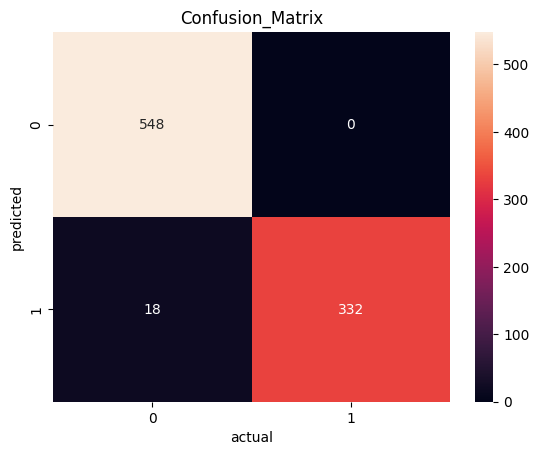

In [352]:
model_evaluation(y_test, y_pred)

#### <font color = 'green'> Training five (5) Models to compare with the baseline models

In [353]:
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier

##### Hyperparameterizing the models 

Hyperparameterizing the models using the GridSearchCV.

In [354]:
from sklearn.model_selection import GridSearchCV

seed = 42
cv = 5

In [355]:
def best_model_training(df, target_col, test_size, seed, model):

    X_train, X_test, y_train, y_test = data_split(df, target_col, test_size, seed)

    model.fit(X_train, y_train)
    best_model = model.best_estimator_
    best_param = model.best_params_
    y_pred = best_model.predict(X_test)

    print(f'The model name is {model} and is fully trained.')
    print(f'The best parameters are {best_param}')

    return y_test, best_model, y_pred

###### Defining all the parameter grids for the models

#### Random Forest Classifier

In [356]:
rf = RandomForestClassifier(random_state=seed)
rf

RandomForestClassifier(random_state=42)

###### Define the parameters of the grid

In [359]:
rf_param_grid = {
    'n_estimators': [100, 200, 300],
    'max_depth': [5, 10, None],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

###### Perform the grid search

In [360]:
rf_grid = GridSearchCV(
    rf,
    rf_param_grid,
    cv=cv,
    scoring='accuracy'
)

###### Training the model

In [361]:
%%time
df = balanced_df
target_col = 'target'
test_size = 0.1

model = rf_grid

y_test, rf_best_model, y_pred = best_model_training(df, target_col, test_size, seed, model)

The model name is GridSearchCV(cv=5, estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [5, 10, None],
                         'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy') and is fully trained.
The best parameters are {'max_depth': None, 'min_samples_leaf': 1, 'min_samples_split': 2, 'n_estimators': 100}
CPU times: total: 6min 5s
Wall time: 6min 33s


accuracy is 0.9855233853006682
precision is 1.0
recall is 0.9628571428571429
f1_score is 0.9810771470160117


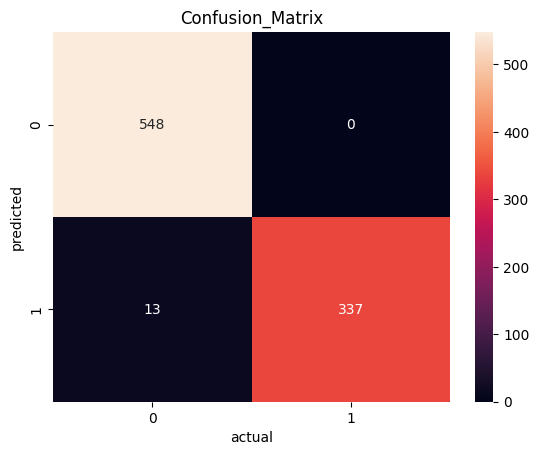

In [362]:
model_evaluation(y_test, y_pred)

#### XGBClassifier Model

In [363]:
xgb = XGBClassifier(random_state=seed)
xgb

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=42, ...)

###### Define the parameters of the grid

In [364]:
xgb_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.3],
    'max_depth': [3, 5, 7]
}

###### Perform the grid search

In [365]:
xgb_grid = GridSearchCV(
    xgb,
    xgb_param_grid,
    cv=cv,
    scoring='accuracy'
)

###### Training the model

In [366]:
%%time
df = balanced_df
target_col = 'target'
test_size = 0.1

model = xgb_grid

y_test, xgb_best_model, y_pred = best_model_training(df, target_col, test_size, seed, model)

The model name is GridSearchCV(cv=5,
             estimator=XGBClassifier(base_score=None, booster=None,
                                     callbacks=None, colsample_bylevel=None,
                                     colsample_bynode=None,
                                     colsample_bytree=None, device=None,
                                     early_stopping_rounds=None,
                                     enable_categorical=False, eval_metric=None,
                                     feature_types=None, gamma=None,
                                     grow_policy=None, importance_type=None,
                                     interaction_constraints=None,
                                     learning_rate=None,...
                                     max_cat_threshold=None,
                                     max_cat_to_onehot=None,
                                     max_delta_step=None, max_depth=None,
                                     max_leaves=None, min_child_weight

accuracy is 0.9855233853006682
precision is 1.0
recall is 0.9628571428571429
f1_score is 0.9810771470160117


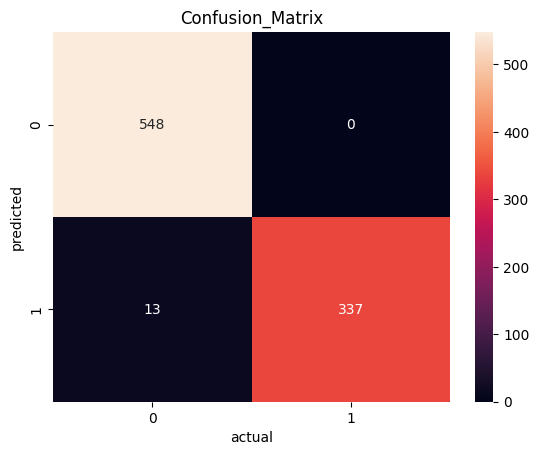

In [367]:
model_evaluation(y_test, y_pred)

#### Gradient Boosting Classifier

In [368]:
gboost = GradientBoostingClassifier(random_state=seed)
gboost

GradientBoostingClassifier(random_state=42)

###### Define the parameters of the grid

In [369]:
gboost_param_grid = {
    'n_estimators': [100, 200, 300],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}

###### Perform the grid search

In [370]:
gboost_grid = GridSearchCV(
    gboost,
    gboost_param_grid,
    cv=cv,
    scoring='accuracy'
)

###### Training the model

In [371]:
%%time
df = balanced_df
target_col = 'target'
test_size = 0.1

model = gboost_grid

y_test, gboost_best_model, y_pred = best_model_training(df, target_col, test_size, seed, model)

The model name is GridSearchCV(cv=5, estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7],
                         'n_estimators': [100, 200, 300]},
             scoring='accuracy') and is fully trained.
The best parameters are {'learning_rate': 0.1, 'max_depth': 7, 'n_estimators': 300}
CPU times: total: 6min
Wall time: 6min 42s


accuracy is 0.9855233853006682
precision is 0.9970501474926253
recall is 0.9657142857142857
f1_score is 0.9811320754716981


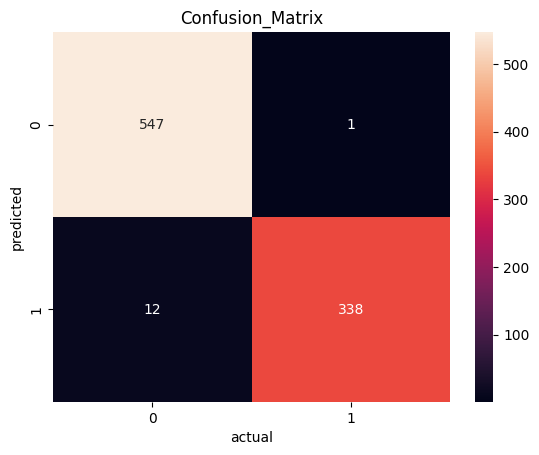

In [372]:
model_evaluation(y_test, y_pred)

##### SUPPORT VECTOR MACHINE

In [373]:
svm =  SVC(probability=True, random_state=seed)
svm

SVC(probability=True, random_state=42)

###### Define the parameters of the grid

In [374]:
svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['rbf', 'poly'],
    'gamma': ['scale', 'auto']
}

###### Perform the grid search

In [375]:
svm_grid = GridSearchCV(
    svm,
    svm_param_grid,
    cv=cv,
    scoring='accuracy'
)

###### Training the model

In [376]:
%%time
df = balanced_df
target_col = 'target'
test_size = 0.1

model = svm_grid

y_test, svm_best_model, y_pred = best_model_training(df, target_col, test_size, seed, model)

The model name is GridSearchCV(cv=5, estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'gamma': ['scale', 'auto'],
                         'kernel': ['rbf', 'poly']},
             scoring='accuracy') and is fully trained.
The best parameters are {'C': 10, 'gamma': 'scale', 'kernel': 'rbf'}
CPU times: total: 2min 53s
Wall time: 3min 13s


accuracy is 0.9855233853006682
precision is 1.0
recall is 0.9628571428571429
f1_score is 0.9810771470160117


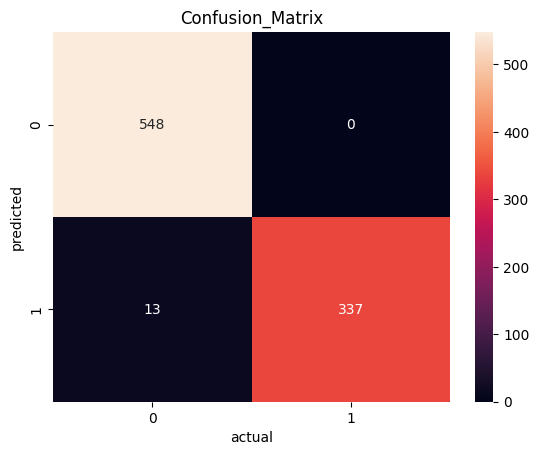

In [377]:
model_evaluation(y_test, y_pred)

##### DECISION TREE CLASSIFIER

In [378]:
dtc = DecisionTreeClassifier(random_state=seed)
dtc

DecisionTreeClassifier(random_state=42)

###### Define the parameters of the grid

In [379]:
dt_param_grid = {
    'max_depth': [3, 5, 7],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4]
}

###### Perform the grid search

In [380]:
dtc_grid = GridSearchCV(
    dtc,
    dt_param_grid,
    cv=cv,
    scoring='accuracy'
)

###### Training the model

In [381]:
%%time
df = balanced_df
target_col = 'target'
test_size = 0.1

model = dtc_grid

y_test, dtc_best_model, y_pred = best_model_training(df, target_col, test_size, seed, model)

The model name is GridSearchCV(cv=5, estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [3, 5, 7], 'min_samples_leaf': [1, 2, 4],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy') and is fully trained.
The best parameters are {'max_depth': 3, 'min_samples_leaf': 1, 'min_samples_split': 2}
CPU times: total: 2.08 s
Wall time: 2.35 s


accuracy is 0.9844097995545658
precision is 1.0
recall is 0.96
f1_score is 0.9795918367346939


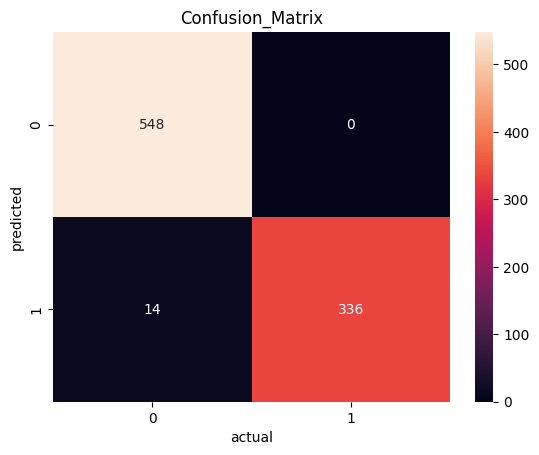

In [382]:
model_evaluation(y_test, y_pred)

#### Combine all the best models and prepare a classification report on the combine model

In [383]:
from sklearn.metrics import accuracy_score, classification_report

rf_best_model
xgb_best_model
gboost_best_model
svm_best_model
dtc_best_model

def classification_reporting(df, target_col, test_size, seed):

    X_train, X_test, y_train, y_test = data_split(df, target_col, test_size, seed)

    y_pred_rf = rf_best_model.predict(X_test)
    y_pred_xgb = xgb_best_model.predict(X_test)
    y_pred_gboost = gboost_best_model.predict(X_test)
    y_pred_svm = svm_best_model.predict(X_test)
    y_pred_dtc = dtc_best_model.predict(X_test)

    rf_acc = accuracy_score(y_pred_rf, y_test)
    xgb_acc = accuracy_score(y_pred_xgb, y_test)
    gboost_acc = accuracy_score(y_pred_gboost, y_test)
    svm_acc = accuracy_score(y_pred_svm, y_test)
    dtc_acc = accuracy_score(y_pred_dtc, y_test)

    best_model = max(
        [
            (rf_best_model, rf_acc),
            (xgb_best_model, xgb_acc),
            (gboost_best_model, gboost_acc),
            (svm_best_model, svm_acc),
            (dtc_best_model, dtc_acc)
        ],
        key=lambda x: x[1]
    )[0]

    best_pred = best_model.predict(X_test)

    print(f'{classification_report(y_test, best_pred)}')

    return best_model, best_pred   

In [384]:
df = balanced_df
target_col = 'target'
test_size = 0.1
seed = 42

best_model, best_pred = classification_reporting(df, target_col, test_size, seed)

              precision    recall  f1-score   support

           0       0.98      1.00      0.99       548
           1       1.00      0.96      0.98       350

    accuracy                           0.99       898
   macro avg       0.99      0.98      0.98       898
weighted avg       0.99      0.99      0.99       898



#### Model Ensemble Techniques

`I ensembled all the best models together and use the voting classifier to vote which the model having the highest weights and establish a new improved model.`

In [168]:
all_best_models = [rf_best_model, xgb_best_model, gboost_best_model, svm_best_model, dtc_best_model]

In [386]:
from sklearn.ensemble import VotingClassifier
voting_clf = VotingClassifier(
    estimators = [
        ('random_forest_best', rf_best_model),
        ('xgb_classifier_best',  xgb_best_model),
        ('gboost_best', gboost_best_model),
        ('svm_best', svm_best_model),
        ('decision_tree_best', dtc_best_model)
    ],
    voting = 'soft'
)

voting_clf

VotingClassifier(estimators=[('random_forest_best',
                              RandomForestClassifier(random_state=42)),
                             ('xgb_classifier_best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('gboost_best',
                              GradientBoostingClassifier(max_depth=7,
                                                         n_estimators=300,
                                                         random_state=42)),
                             ('svm_best',
                              SVC(C=10, probability=True, random_state=42)),
                             ('decision_tree_best',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))],
                 voting='soft')

##### Fitting the voting classifier model

In [387]:
from sklearn.metrics import accuracy_score, classification_report

def voting_classifier_model_training(df, target_col, test_size, seed, voting_model):

    X_train, X_test, y_train, y_test = data_split(df, target_col, test_size, seed)

    voting_model.fit(X_train, y_train)

    voting_proba = voting_model.predict_proba(X_test)

    voting_pred = voting_model.predict(X_test)

    voting_accuracy = accuracy_score(y_test, voting_pred)
    classification_reporting = classification_report(y_test, voting_pred)

    print(f'The model name is {voting_model} and is fully trained.')
    print(f'{classification_reporting}')

    return y_test, voting_model, voting_pred

In [389]:
%%time
df = balanced_df
target_col = 'target'
test_size = 0.1
seed = 42
voting_model = voting_clf

y_test, voting_model, voting_pred = voting_classifier_model_training(df, target_col, test_size, seed, voting_model)

The model name is VotingClassifier(estimators=[('random_forest_best',
                              RandomForestClassifier(random_state=42)),
                             ('xgb_classifier_best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                     

In [390]:
voting_model

VotingClassifier(estimators=[('random_forest_best',
                              RandomForestClassifier(random_state=42)),
                             ('xgb_classifier_best',
                              XGBClassifier(base_score=None, booster=None,
                                            callbacks=None,
                                            colsample_bylevel=None,
                                            colsample_bynode=None,
                                            colsample_bytree=None, device=None,
                                            early_stopping_rounds=None,
                                            enable_categorical=False,
                                            eval_metric=None,
                                            feature_types=None, gamma=None...
                                            monotone_constraints=None,
                                            multi_strategy=None,
                                            n_estimators=200, n_jobs=None,
                                            num_parallel_tree=None,
                                            random_state=42, ...)),
                             ('gboost_best',
                              GradientBoostingClassifier(max_depth=7,
                                                         n_estimators=300,
                                                         random_state=42)),
                             ('svm_best',
                              SVC(C=10, probability=True, random_state=42)),
                             ('decision_tree_best',
                              DecisionTreeClassifier(max_depth=3,
                                                     random_state=42))],
                 voting='soft')

###### <font color = 'green'> Saving all models and preprocessing pipelines

In [550]:
os.chdir(model_path)

In [551]:
import pickle

###### <font color = 'red'> If anything changes in the notebook, open !!!

###### <font color = 'green'> Load all models and the preprocessing steps for inferencing

In [552]:
with open('advanced_prep_steps_and_models_dsn_hackathon_v6.pkl', 'rb') as file:
    inference = pickle.load(file)

In [553]:
os.chdir(note_path)

###### Accessing the models and preprocessing pipelines

In [554]:
inference

{'scaler_version_6': StandardScaler(),
 'min_max_version_6': MinMaxScaler(),
 'one_hot_encoder': OneHotEncoder(sparse_output=False),
 'important_feature_selection': SelectKBest(k=15),
 'imp_feat_select': RFE(estimator=LogisticRegression(random_state=42), n_features_to_select=15),
 'rf_best': RandomForestClassifier(random_state=42),
 'xgbclassifier_best': XGBClassifier(base_score=None, booster=None, callbacks=None,
               colsample_bylevel=None, colsample_bynode=None,
               colsample_bytree=None, device=None, early_stopping_rounds=None,
               enable_categorical=False, eval_metric=None, feature_types=None,
               gamma=None, grow_policy=None, importance_type=None,
               interaction_constraints=None, learning_rate=0.1, max_bin=None,
               max_cat_threshold=None, max_cat_to_onehot=None,
               max_delta_step=None, max_depth=3, max_leaves=None,
               min_child_weight=None, missing=nan, monotone_constraints=None,
          

###### models

In [555]:
random_forest = inference['rf_best']
xgbclassifier = inference['xgbclassifier_best']
gradient_boosting = inference['gboost_best']
support_vector = inference['svm_best']
decision_tree = inference['decision_tree_best']
combined_best = inference['all_best_max']
voting_classifier = inference['voting_classifier_best']

###### preprocessing

In [556]:
standard_scaler = inference['scaler_version_6']
minmax_scaler = inference['min_max_version_6']
one_hot_encoder = inference['one_hot_encoder']
feature_selector_one = inference['important_feature_selection']
feature_selector_two = inference['imp_feat_select']

#### <font color = 'green'> Preprocessing Pipeline for the Test data

In [683]:
test.head()

,id,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


In [684]:
testing = test.copy()

In [685]:
testing.columns = ['Id', 'Age', 'Sex', 'cp', 'trestbps', 'chol', 'fbs', 'restecg', 'thalach', 'exang', 'oldpeak', 'slope', 'ca', 'thal']

In [686]:
testing.head()

,Id,Age,Sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal
0,16501,70,1,0,163,495,0,2,170,1,2.0,1,0,1
1,10444,61,1,0,131,238,0,2,74,1,4.9,2,2,2
2,14288,53,1,0,95,558,1,1,73,1,0.7,1,1,0
3,10409,37,0,1,178,287,0,1,192,1,5.7,1,0,0
4,17330,35,0,3,104,281,0,0,122,0,1.3,1,4,3


###### Feature Engineering for the Test Data

In [672]:
def feature_engineering_testing(testing):

    df = testing
    col_name = 'Age'
    labels = ['young', 'adult', 'aged']
    feature_age = binning_column(df, col_name, labels)

    df = feature_age
    col_name = 'trestbps'
    labels = ['low', 'moderate', 'high']
    feature_testbps = binning_column(df, col_name, labels)

    df = feature_testbps
    col_name = 'chol'
    labels = ['low', 'moderate', 'high']
    feature_chol = binning_column(df, col_name, labels)

    df = feature_chol
    col_name = 'thalach'
    labels = ['low', 'medium', 'high']
    feature_thalach = binning_column(df, col_name, labels)
    
    testing = feature_thalach.copy()
    
    return testing

###### Preprocessing the numerical and categorical data in the Testing data

In [674]:
standard_scaler
minmax_scaler
one_hot_encoder

def num_cat_inference_preprocessing(df):
    num_cols = ['Age', 'trestbps', 'chol', 'thalach', 'oldpeak']
    features = df.drop('Id', axis=1)
    num_data = features[num_cols]

    num = standard_scaler.transform(num_data)
    num_min = minmax_scaler.transform(num)
    full_num_df = pd.DataFrame(num_min, columns=num_cols)

    cat_cols = features.drop(columns=num_cols).columns.tolist()
    cat_data = features[cat_cols]
    encoded_cat_cols = ['Sex', 'cp', 'fbs', 'restecg', 'exang', 'slope', 'ca', 'thal']
    encoded_cat_df = cat_data[encoded_cat_cols]
    to_be_encoded_cols = cat_data.drop(columns=encoded_cat_cols).columns.tolist()
    to_be_encoded_df = cat_data[to_be_encoded_cols]

    cat_encoded = one_hot_encoder.transform(to_be_encoded_df)
    cat_df = cat_encoded.reset_index(drop=True)
    full_cat_encoded_df = pd.concat([encoded_cat_df, cat_df], axis=1)

    num_cat_df = pd.concat([full_num_df, full_cat_encoded_df], axis=1)
    
    return num_cat_df

###### Drop correlation features from Test Data

In [678]:
def drop_correlation_feature_test(df, cols):
    testing = df.drop(columns=cols)
    return testing

##### Feature Selection for Test data

In [681]:
feature_selector_one
random_forest_top_features
feature_selector_two

def feature_selection_test(df):

    features = df.copy()
    first_selection = feature_selector_one.transform(features)
    first_selection_names = features.columns[feature_selector_one.get_support()].tolist()

    second_selection = features[random_forest_top_features].columns.tolist()

    third_selection = feature_selector_two.transform(features)
    third_selection_names = features.columns[feature_selector_two.support_].tolist()
    
    # Combine the results and select the final set of important features
    all_selected_features = set(first_selection_names + third_selection_names + second_selection)
    # Create a new dataset with selected features
    important_features_selected = features[list(all_selected_features)]

    df_selected = pd.DataFrame(important_features_selected, columns=list(all_selected_features))

    return df_selected    

###### <font color = 'green'> Using the best model to predict the target

In [687]:
standard_scaler
minmax_scaler
one_hot_encoder
feature_selector_one
random_forest_top_features
feature_selector_two
corr_list

def inference_and_prediction_pipeline(df, best_model, cols = corr_list):

    testing = df.copy()
    feature_eng = feature_engineering_testing(testing)
    num_cat_prep = num_cat_inference_preprocessing(feature_eng)
    correlated = drop_correlation_feature_test(num_cat_prep, cols)

    final_df = feature_selection_test(correlated)

    target_predicted = best_model.predict(final_df)

    return target_predicted 

In [688]:
%%time
df = testing
best_model = voting_classifier

target_predicted = inference_and_prediction_pipeline(df, best_model, cols = corr_list)

CPU times: total: 844 ms
Wall time: 756 ms


###### Submission Format

In [689]:
submission_file_best_model = pd.DataFrame({'ID': testing['Id'], 'Target': target_predicted})

In [690]:
submission_file_best_model.shape

(2697, 2)

###### Saving the submission file

In [691]:
os.chdir(out_path)

In [692]:
submission_file_best_model.to_csv('olanrewaju_improved_dsn_hackathon_v6.csv', index=False)

In [693]:
os.chdir(note_path)